**Import libraries**

In [1]:
import os
from IPython.display import display, clear_output
from time import *
from func_cif_icsd_presentation import *
from func_hkl import *
import matplotlib.pyplot as plt

**File management**

In [2]:
# Here enters the mode of calculation
# We have throughly compute "1", & data check "2"
cal_mode = 1

# Here enters the folder of you CIF files. (NO slash on left)
# in_dir = 'Complex'
in_dir = 'archive_cif/icsd_archive'
# Here enters the folder of your output files.
out_dir = 'archive_presentation'
# Calculate hkl planes based on wanted accurracy
hkl_max = 14

# Use script func_hkl to generate hkl matrix
print("Generating hkl matrix")
hkl_info = hkl(hkl_max)
print("hkl_info done!\n") # This print is usually ignored

Generating hkl matrix
Generating hkl_info
Generating hkl_exp
Generating hkl_redu
Generating hkl_exp2
Generating hkl_multi
hkl_info done!



Calculating archive_cif/icsd_archive\1-7000: YourCustomFileName_CollCode1441.cif
1/5 Done: ATOM [[204.       1.       0.5      0.5      0.5      1.    ]
 [  8.       1.       0.6081   0.7661   0.7021   1.    ]
 [  8.       2.       0.7931   0.3651   0.6101   1.    ]
 [  8.       3.       0.1961   0.3761   0.7731   1.    ]
 [  7.       1.       0.6341   0.2801   0.7801   1.    ]
 [  8.       4.       0.1092   0.9141   0.7922   1.    ]
 [  1.       1.       0.9513   0.6082   0.2832   1.    ]
 [  1.       2.       0.8252   0.7933   0.2032   1.    ]
 [  1.       3.       0.3082   0.6413   0.0553   1.    ]
 [  1.       4.       0.3932   0.8983   0.2222   1.    ]
 [  1.       5.       0.8492   0.1702   0.3523   1.    ]
 [  1.       6.       0.0473   0.1462   0.2063   1.    ]]
2/5 Done: SYMM
3/5 Done: ATOM + SYMM
[7.   1.   0.63 0.28 0.78 1.  ]
[7.   1.   0.37 0.72 0.22 1.  ]
hkl_d
hkl_2theta
lp
hkl_pos
pos_pop [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
temp_f

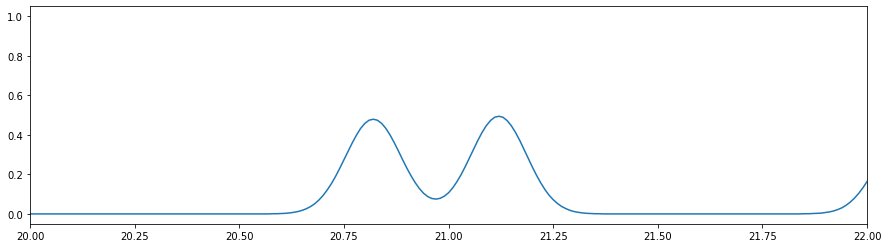

Writing output
Result of  YourCustomFileName_CollCode1441.cif :  GOOD! 
 Progress:  1 / 4028 
 timecost:  5.068
Pipeline complete! Total Fail:  0 / 4028


In [3]:
from func_cif_icsd_presentation import *
# Find current working directory
cwdir = os.getcwd()
# Count availble CIF files
cif_count = 0
for path, dirs, files in os.walk(in_dir):
    for file in files:
        if file.endswith('.cif'):
            cif_count += 1

# Calculate XRD and show progress
x_min = 20
x_max = 22
cif_cal_count = 0
cif_fail_count = 0
for path, dirs, files in os.walk(in_dir):
    for file in files:
        if file.endswith('Code1441.cif'):
            # Write a log file
            print("Calculating " + path + ": " + file,)
            # Here combines cwd and subdirectory
            full_dir = "{}/{}".format(cwdir, path)
            # Here record timing
            time_start = time()
            # Here calls main function to calculate XRD and output
            cif_return = cif(full_dir, file, out_dir, hkl_info, x_min, x_max, cal_mode)
            # Here record timing
            time_cost = format(time() - time_start, '.3f')
            cif_cal_count += 1
            print("Result of ", file, ": ", cif_return, "\n", 
                  "Progress: ", str(cif_cal_count), "/", str(cif_count), "\n",
                  "timecost: ", time_cost)
            # Store log files failed calculations
            
print("Pipeline complete! Total Fail: ", cif_fail_count, "/", cif_count)